In [7]:
!pip install -q kaggle

In [9]:
from google.colab import files

In [10]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jingyuechen","key":"f9dabfc4cd2d26ed5d2cdfc6537008da"}'}

In [15]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [17]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:14<00:00, 94.4MB/s]
100% 1.03G/1.03G [00:14<00:00, 75.1MB/s]


In [19]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
from tensorflow.keras import layers

In [15]:
!mkdir asl_alphabet_train_test/

In [17]:
!cp -r asl_alphabet_train/asl_alphabet_train/A/ asl_alphabet_train_test/
!cp -r asl_alphabet_train/asl_alphabet_train/B/ asl_alphabet_train_test/
!ls

asl_alphabet_test   asl_alphabet_train_test  kaggle.json
asl_alphabet_train  asl-alphabet.zip	     sample_data


In [18]:
!ls asl_alphabet_train_test/

A  B


In [19]:
data_dir="/content/asl_alphabet_train_test"
data_dir = pathlib.Path(data_dir)

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6000


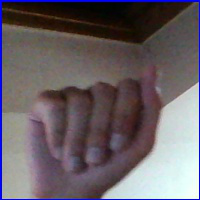

In [21]:
alphs = list(data_dir.glob('A/*'))
PIL.Image.open(str(alphs[0]))

In [22]:
batch_size = 32
img_height = 200
img_width = 200

In [23]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6000 files belonging to 2 classes.
Using 4800 files for training.


In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['A', 'B']


In [27]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
num_classes = 29

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [31]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
150/150 [==============================] - 216s 1s/step - loss: 0.4758 - accuracy: 0.7640 - val_loss: 0.3089 - val_accuracy: 0.8575
Epoch 2/3
150/150 [==============================] - 216s 1s/step - loss: 0.1328 - accuracy: 0.9444 - val_loss: 0.0864 - val_accuracy: 0.9675
Epoch 3/3
150/150 [==============================] - 210s 1s/step - loss: 0.0573 - accuracy: 0.9794 - val_loss: 0.0475 - val_accuracy: 0.9825
